In [72]:
import numpy as np
import colorsys
import matplotlib.pyplot as plt
import seaborn as sns

from aerobotics.api import get_orchard_tree_lat_lon
from orchard.grid import Grid

sns.set()
%config InlineBackend. figure_format = 'retina'

In [9]:
with open('production.env', 'r') as file:
    for line in file:
        if line.startswith('AEROBOTICS_BASE_URL'):
            AEROBOTICS_BASE_URL = line.strip().split('=')[1]
        elif line.startswith('AEROBOTICS_API_TOKEN'):
            AEROBOTICS_API_TOKEN = line.strip().split('=')[1]
tree_lat_lon = get_orchard_tree_lat_lon(AEROBOTICS_BASE_URL, 216269, AEROBOTICS_API_TOKEN)
grid = Grid(tree_lat_lon[:,0], tree_lat_lon[:,1])

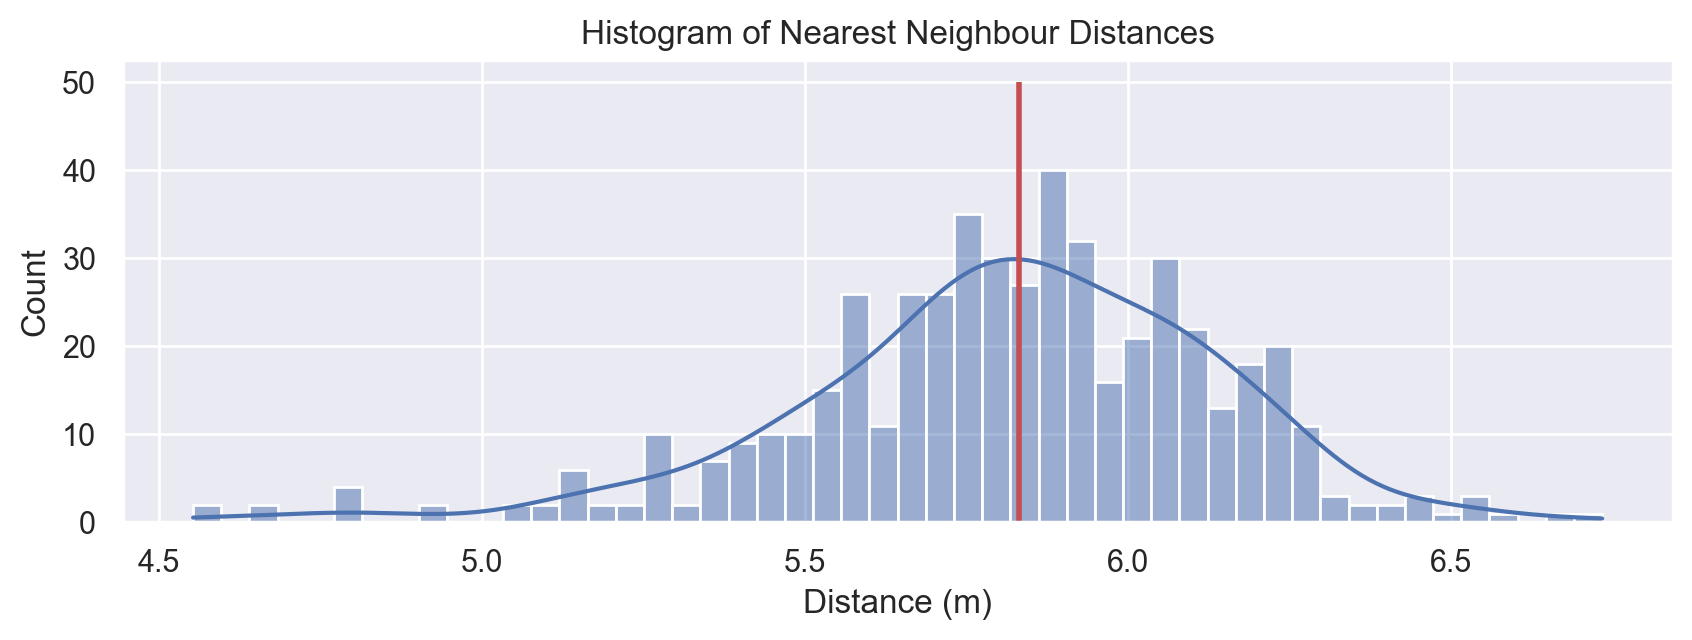

In [11]:
plt.figure(figsize=(10,3))
plt.title('Histogram of Nearest Neighbour Distances')
sns.histplot(grid.nn_dists[:,1], bins=50, kde='density')
plt.vlines(np.median(grid.nn_dists[:,1]), 0, 50, colors='r', linewidth=2)
plt.xlabel('Distance (m)')
plt.show()

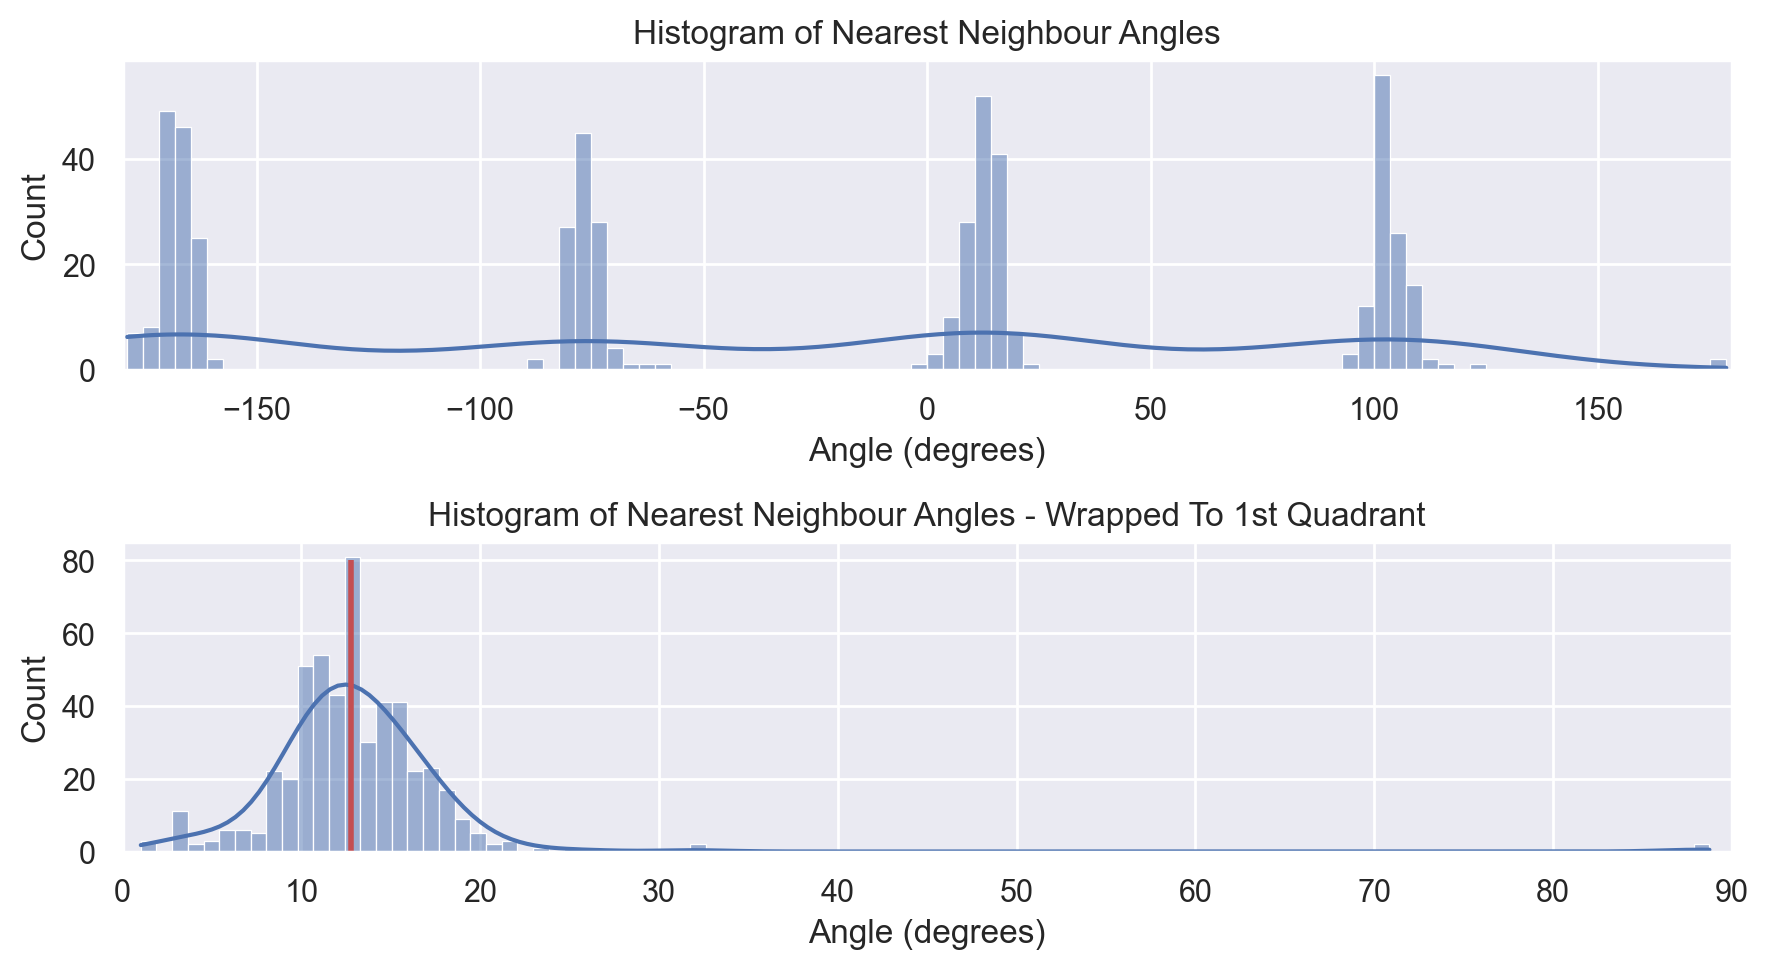

In [37]:

# Nearest neighbour angles
delta = np.subtract(grid.utm_points[grid.nn_indices[:,0]], grid.utm_points[grid.nn_indices[:,1]])
angles = np.arctan2(delta[:,0], delta[:,1])
fig, axs = plt.subplots(2, 1, figsize=(9,5))
axs[0].title.set_text('Histogram of Nearest Neighbour Angles')
sns.histplot(np.rad2deg(angles), bins=100, kde='density', ax=axs[0])
axs[0].set_xlabel('Angle (degrees)')
axs[0].set_xlim((-180, 180))

# Wrap angles to 1st quadrant
angles %= (np.pi/2)
axs[1].title.set_text('Histogram of Nearest Neighbour Angles - Wrapped To 1st Quadrant')
sns.histplot(np.rad2deg(angles), bins=100, kde='density', ax=axs[1])
axs[1].vlines(np.rad2deg(np.median(angles)), 0, 80, colors='r', linewidth=2)
axs[1].set_xlabel('Angle (degrees)')
axs[1].set_xlim((0, 90))
plt.tight_layout()
plt.show()

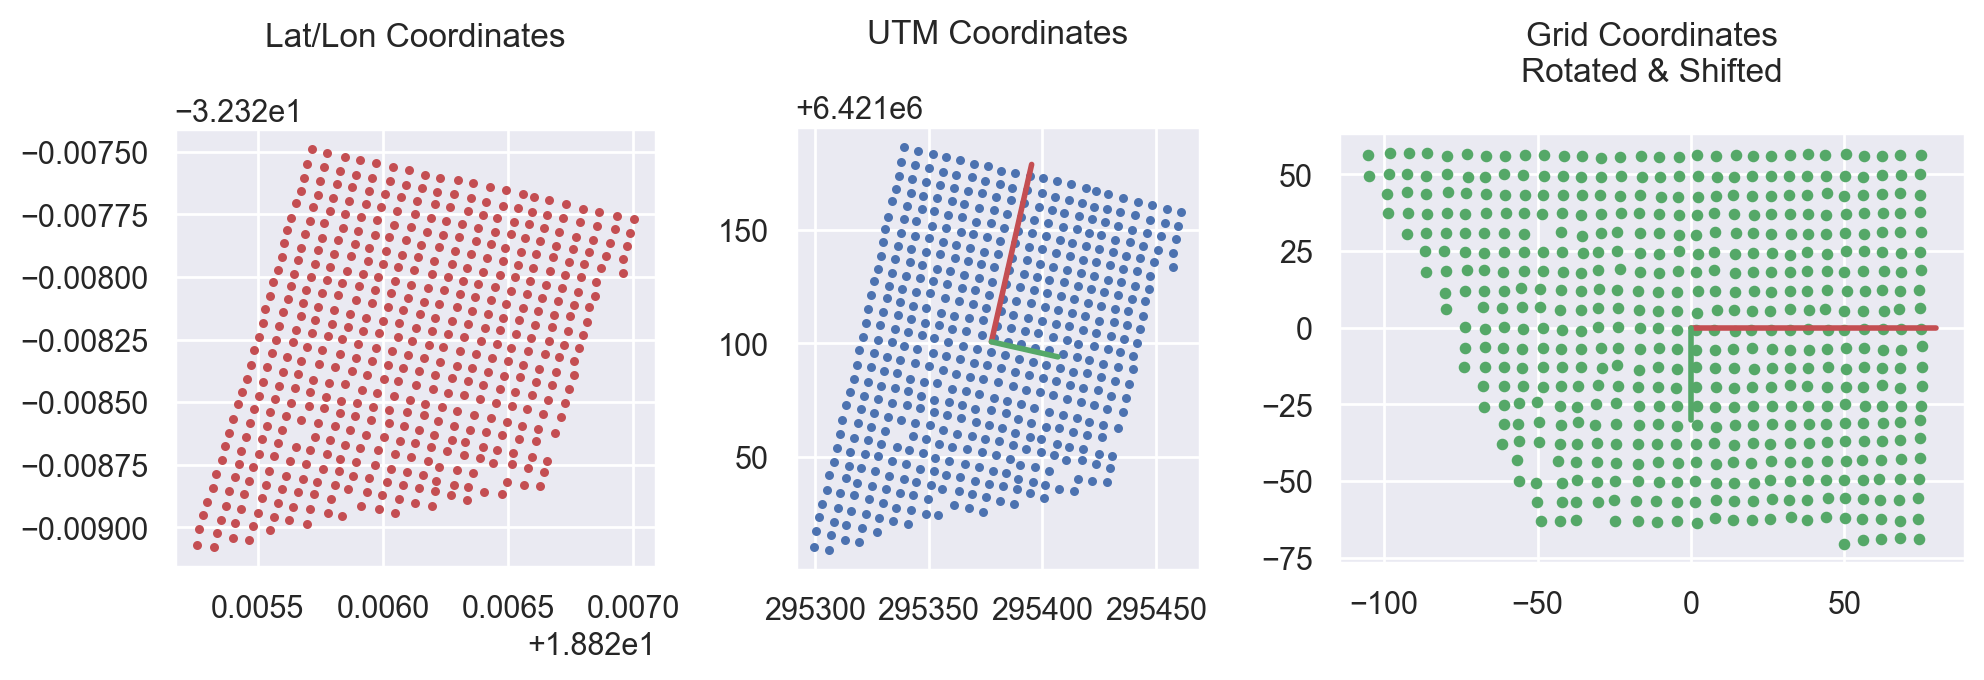

In [38]:

fig, axs = plt.subplots(1, 3, figsize=(10,5), width_ratios=(1,0.84,1.3))

axs[0].title.set_text('Lat/Lon Coordinates\n')
axs[0].scatter(x=grid.longitude, y=grid.latitude, s=5, c='r')
axs[0].set_aspect('equal', 'box')

axs[1].title.set_text('UTM Coordinates\n')
axs[1].scatter(x=grid.utm_points[:,0], y=grid.utm_points[:,1], s=5, c='b')
axs[1].set_aspect('equal', 'box')


cx, cy = grid.utm_centre
d = np.median(grid.nn_dists[:,1])
a = np.median(grid.grid_angle)
b = a - (np.pi/2)
axs[1].plot([cx, cx+80*np.cos(a)], [cy, cy+80*np.sin(a)], c='r', linewidth=2)
axs[1].plot([cx, cx+30*np.cos(b)], [cy, cy+30*np.sin(b)], c='g', linewidth=2)

axs[2].title.set_text('Grid Coordinates\nRotated & Shifted\n')
axs[2].scatter(x=grid.x, y=grid.y, s=10, c='g')
axs[2].set_aspect('equal', 'box')
axs[2].plot([0,80], [0, 0], c='r', linewidth=2)
axs[2].plot([0,0], [0, -30], c='g', linewidth=2)


plt.tight_layout()

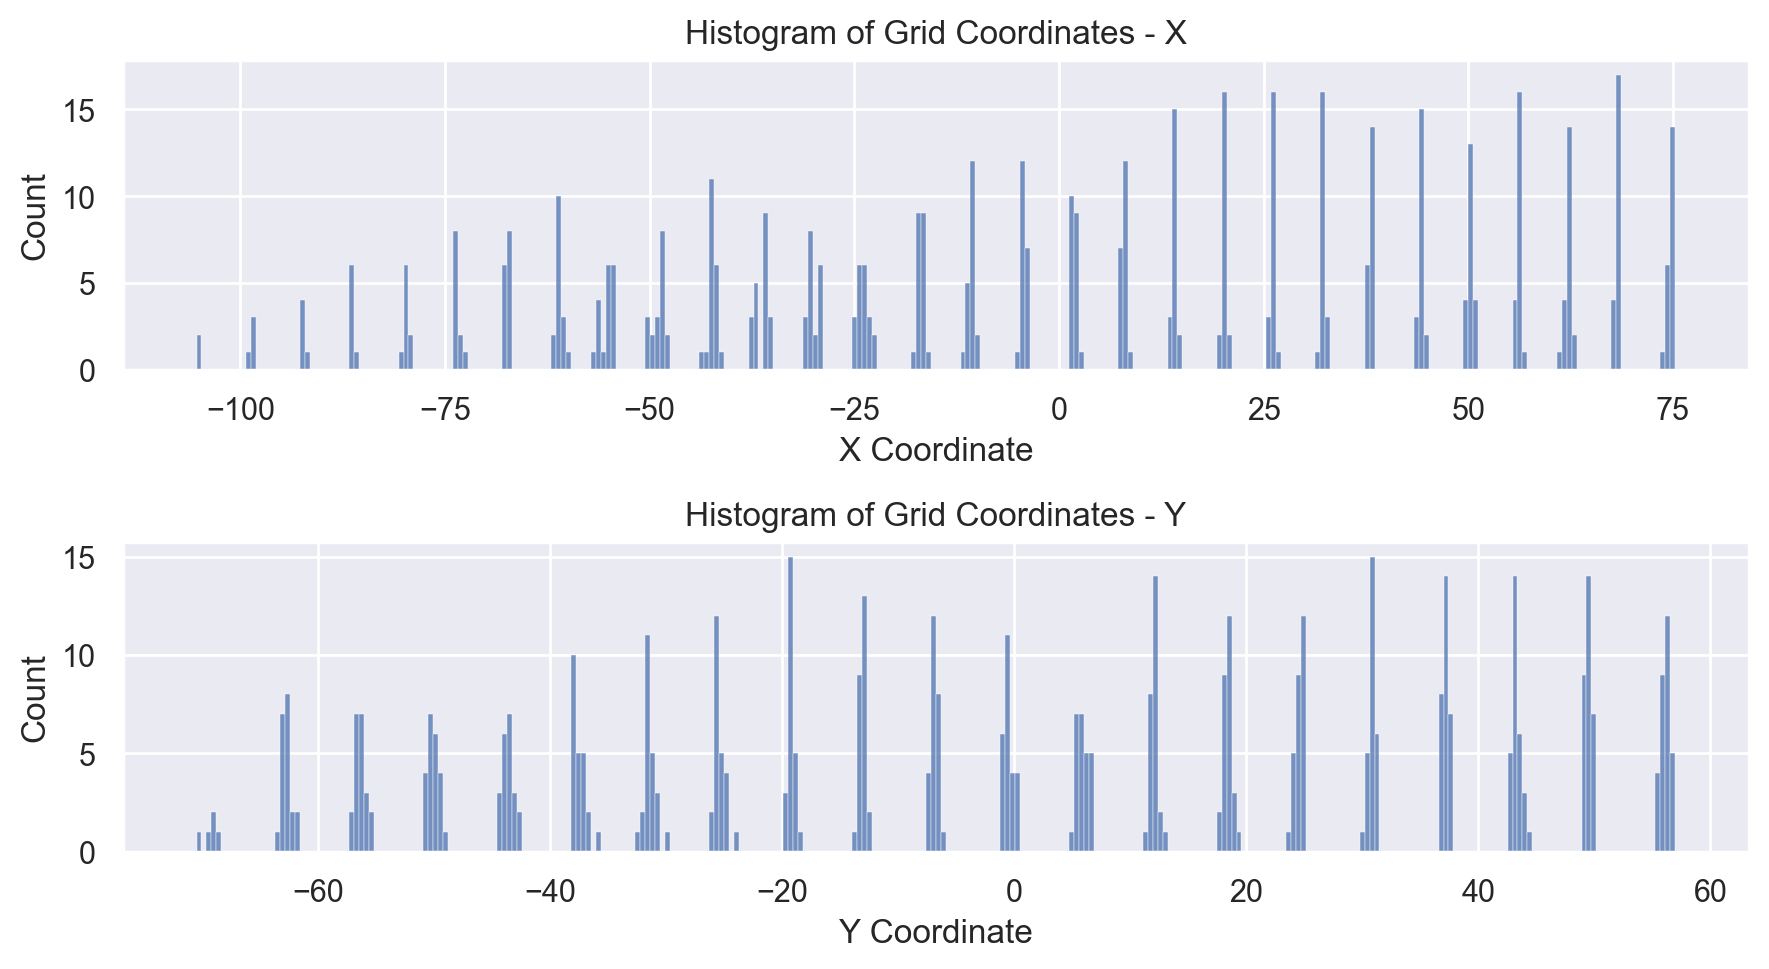

In [53]:
fig, axs = plt.subplots(2, 1, figsize=(9,5))
axs[0].title.set_text('Histogram of Grid Coordinates - X')
sns.histplot(grid.x, bins=300, ax=axs[0])
axs[0].set_xlabel('X Coordinate')

axs[1].title.set_text('Histogram of Grid Coordinates - Y')
sns.histplot(grid.y, bins=300, ax=axs[1])
axs[1].set_xlabel('Y Coordinate')

plt.tight_layout()
plt.show()


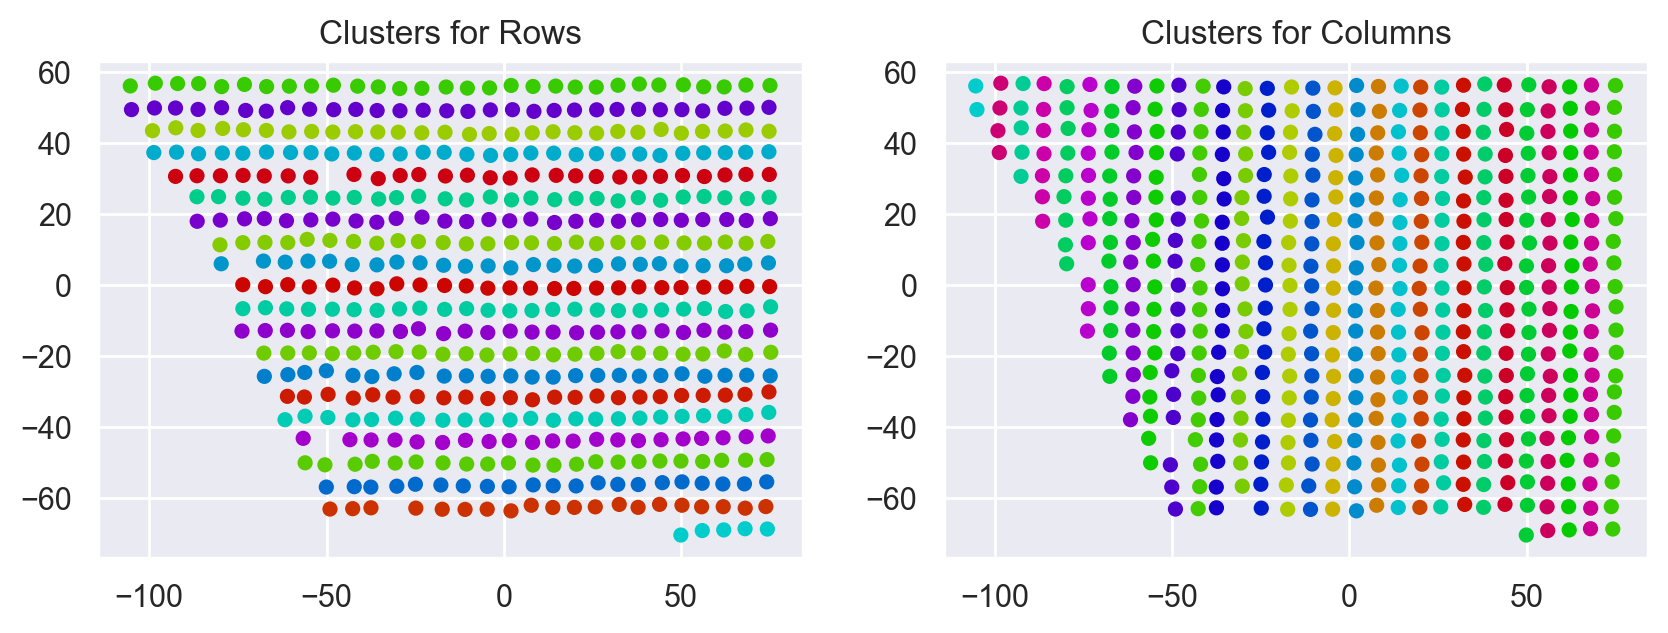

In [78]:
def create_cmap(N, lightness=0.4, saturation=1.0):
    hues = [(0.5 + i * np.pi) % 1.0 for i in range(N)]
    rgb_colors = [colorsys.hls_to_rgb(h, lightness, saturation) for h in hues]
    return plt.cm.colors.ListedColormap(rgb_colors)

fig, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].title.set_text('Clusters for Rows')
axs[0].set_aspect('equal', 'box')
axs[0].scatter(x=grid.x, y=grid.y, c=grid.rows, cmap=create_cmap(len(grid.rows)), s=20)

axs[1].title.set_text('Clusters for Columns')
axs[1].set_aspect('equal', 'box')
axs[1].scatter(x=grid.x, y=grid.y, c=grid.cols, cmap=create_cmap(len(grid.cols)), s=20)
plt.show()

Text(0, 0.5, 'Grid Y')

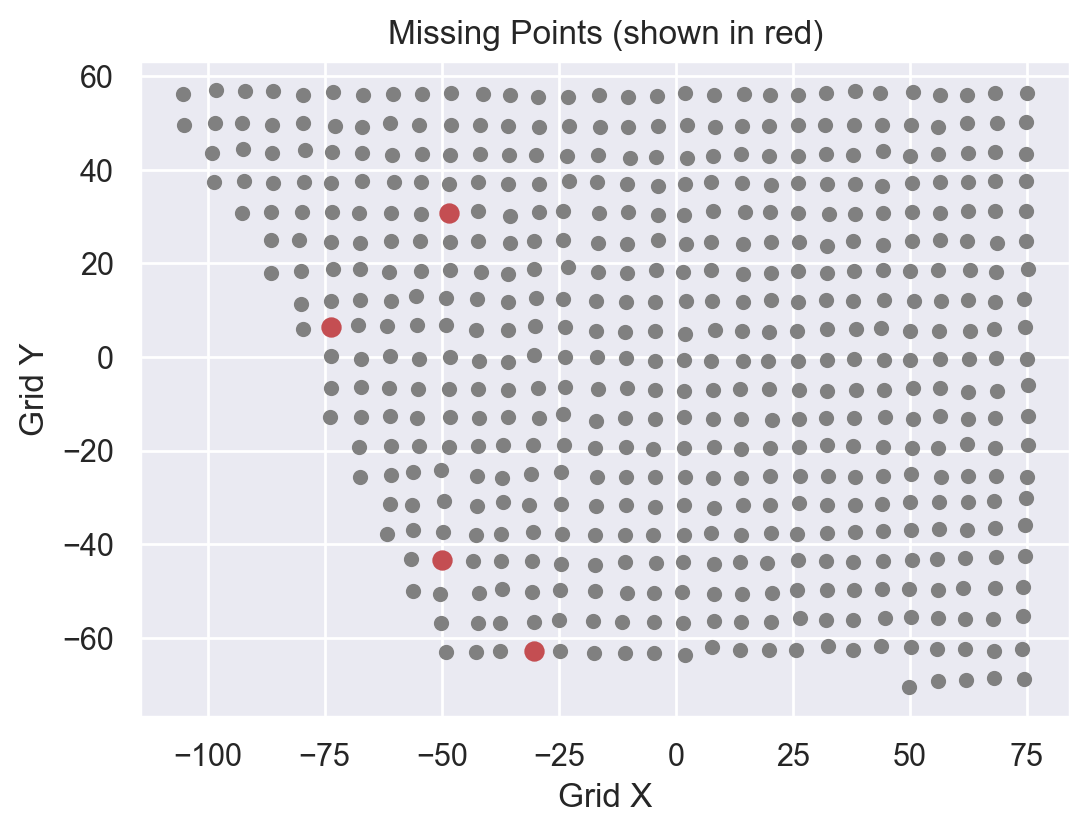

In [103]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.title.set_text('Missing Points (shown in red)')
ax.set_aspect('equal', 'box')
ax.scatter(x=grid.x, y=grid.y, c='gray', s=20)
missing = grid.detect_missing_points()
ax.scatter(x=missing[:,0], y=missing[:,1], c='r', s=40)
ax.set_xlabel('Grid X')
ax.set_ylabel('Grid Y')

Text(0, 0.5, 'Latitude')

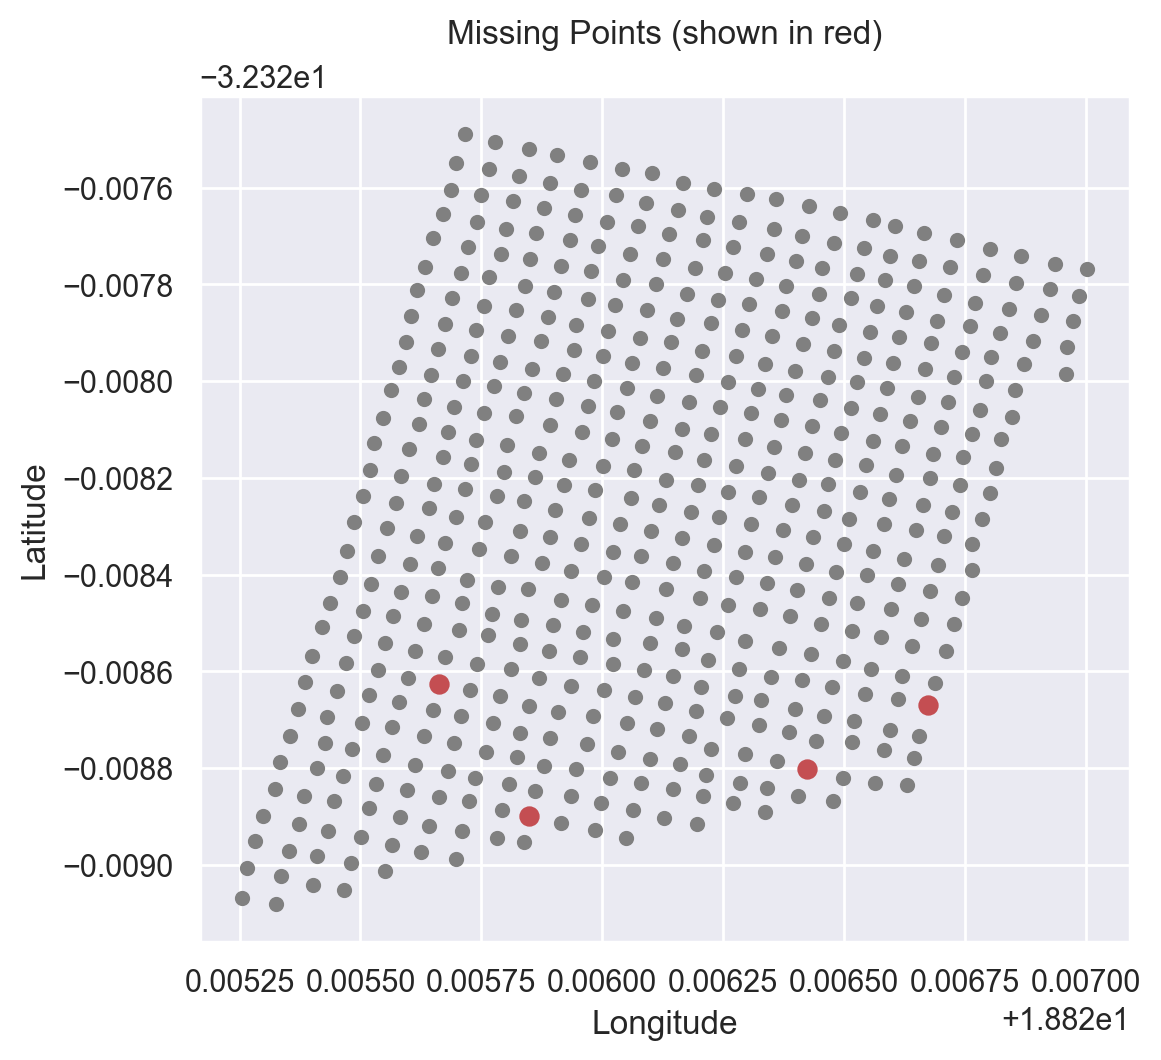

In [101]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.title.set_text('Missing Points (shown in red)\n')
ax.set_aspect('equal', 'box')
ax.scatter(x=grid.longitude, y=grid.latitude, c='gray', s=20)
missing = grid.detect_missing_lat_lon()
ax.scatter(x=missing[:,1], y=missing[:,0], c='r', s=40)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')